In [1]:
import numpy as np 
import os
import time
import matplotlib.pyplot as plt
import random

from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras import backend as keras


Using TensorFlow backend.


## Cargamos las imágenes

**Imágenes de train**

In [2]:
imgs_train_t1 = np.load('./data/train_test/imgs_train_t1.npy')
tags_train_t1 = np.load('./data/train_test/tags_train_t1bin.npy') 

In [3]:
imgs_train_t1ce = np.load('./data/train_test/imgs_train_t1ce.npy')
tags_train_t1ce = np.load('./data/train_test/tags_train_t1cebin.npy')

In [4]:
imgs_train_global = np.load('./data/train_test/imgs_train_global.npy')
tags_train_global = np.load('./data/train_test/tags_train_globalbin.npy')

In [5]:
xt1_train = imgs_train_t1.copy()
yt1_train = tags_train_t1.copy()

xt1ce_train = imgs_train_t1ce.copy()
yt1ce_train = tags_train_t1ce.copy()

xglobal_train = imgs_train_global.copy()
yglobal_train = tags_train_global.copy()

In [6]:
print('IMÁGENES T1:')
print('Antes:', xt1_train.shape, yt1_train.shape)
xt1_train2 = np.expand_dims(xt1_train, -1)
yt1_train2 = np.expand_dims(yt1_train, -1)
print('Después:', xt1_train2.shape, yt1_train2.shape)

IMÁGENES T1:
Antes: (7394, 240, 240) (7394, 240, 240)
Después: (7394, 240, 240, 1) (7394, 240, 240, 1)


In [7]:
print('IMÁGENES T1 CON CONTRASTE:')
print('Antes:', xt1ce_train.shape, yt1ce_train.shape)
xt1ce_train2 = np.expand_dims(xt1ce_train, -1)
yt1ce_train2 = np.expand_dims(yt1ce_train, -1)
print('Después:', xt1ce_train2.shape, yt1ce_train2.shape)

IMÁGENES T1 CON CONTRASTE:
Antes: (4725, 240, 240) (4725, 240, 240)
Después: (4725, 240, 240, 1) (4725, 240, 240, 1)


In [84]:
print('SET CON TODAS LAS IMÁGENES:')
print('Antes:', xglobal_train.shape, yglobal_train.shape)
xglobal_train2 = np.expand_dims(xglobal_train, -1)
yglobal_train2 = np.expand_dims(yglobal_train, -1)
print('Después:', xglobal_train2.shape, yglobal_train2.shape)

SET CON TODAS LAS IMÁGENES:
Antes: (9636, 240, 240) (9636, 240, 240)
Después: (9636, 240, 240, 1) (9636, 240, 240, 1)


**Imágenes de test**

In [9]:
imgs_test_t1 = np.load('./data/train_test/imgs_test_t1.npy')
tags_test_t1 = np.load('./data/train_test/tags_test_t1bin.npy')

xt1_test = imgs_test_t1.copy()
yt1_test = tags_test_t1.copy()

xt1_test2 = np.expand_dims(xt1_test, -1)
yt1_test2 = np.expand_dims(yt1_test, -1)

In [10]:
imgs_test_t1ce = np.load('./data/train_test/imgs_test_t1ce.npy')
tags_test_t1ce = np.load('./data/train_test/tags_test_t1cebin.npy')

xt1ce_test = imgs_test_t1ce.copy()
yt1ce_test = tags_test_t1ce.copy()

xt1ce_test2 = np.expand_dims(xt1ce_test, -1)
yt1ce_test2 = np.expand_dims(yt1ce_test, -1)

In [11]:
imgs_test_global = np.load('./data/train_test/imgs_test_global.npy')
tags_test_global = np.load('./data/train_test/tags_test_globalbin.npy')

xglobal_test = imgs_test_global.copy()
yglobal_test = tags_test_global.copy()

xglobal_test2 = np.expand_dims(xglobal_test, -1)
yglobal_test2 = np.expand_dims(yglobal_test, -1)

In [88]:
print('T1 test',xt1_test.shape)
print('T1ce test',xt1ce_test.shape)


T1 test (2454, 240, 240)
T1ce test (1590, 240, 240)


**Distribuimos las imágenes aleatoriamente en su conjunto.**

In [16]:
# RANDOMIZAR DOS ARRAYS A LA VEZ
def randomizar(x, x2, y, y2):
    z = list(zip(x, x2, y, y2))
    random.shuffle(z)
    x[:], x2[:], y[:], y2[:] = zip(*z)
    
    return x,x2,y,y2

In [17]:
xt1_train, xt1_train2, yt1_train, yt1_train2 = randomizar(xt1_train, xt1_train2, yt1_train, yt1_train2)
xt1ce_train, xt1ce_train2, yt1ce_train, yt1ce_train2 = randomizar(xt1ce_train, xt1ce_train2, yt1ce_train, yt1ce_train2)
xglobal_train, xglobal_train2, yglobal_train, yglobal_train2 = randomizar(xglobal_train, xglobal_train2, yglobal_train, yglobal_train2)

In [34]:
xt1_test, xt1_test2, yt1_test, yt1_test2 = randomizar(xt1_test, xt1_test2, yt1_test, yt1_test2)
xt1ce_test, xt1ce_test2, yt1ce_test, yt1ce_test2 = randomizar(xt1ce_test, xt1ce_test2, yt1ce_test, yt1ce_test2)
xglobal_test, xglobal_test2, yglobal_test, yglobal_test2 = randomizar(xglobal_test, xglobal_test2, yglobal_test, yglobal_test2)

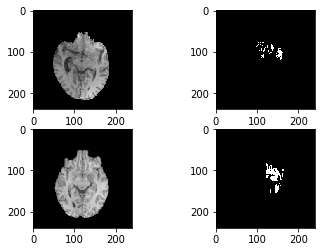

In [21]:
plt.subplot(2,2,1)
plt.imshow(xt1_train[0],cmap='gray')

plt.subplot(2,2,2)
plt.imshow(yt1_train[0],cmap='gray')

plt.subplot(2,2,3)
plt.imshow(xt1_train[1],cmap='gray')

plt.subplot(2,2,4)
plt.imshow(yt1_train[1],cmap='gray')

---

# Definición del modelo 

In [22]:
def conv2d_block(input_tensor, n_filters, kernel_size=3, batchnorm=True):
    """Construye un bloque convolucional compuesto por dos capas convolucionales, con activación ReLU
    y BatchNormalization si np se especifica lo contrario"""
    
    # first layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    
    # second layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

def get_unet(input_img, n_filters=16, dropout=0.5, batchnorm=True):
    """Construye la arquitectura de la red, a través de bloques convolucionales,
    seguidos por MaxPool y Dropout para el camino de contracción. 
    El camino de expansión se compone por una convolución inversa seguida por Dropout y 
    un bloque deconvolucional."""
    # contracting path
    c1 = conv2d_block(input_img, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    p1 = MaxPooling2D((2, 2)) (c1)
    p1 = Dropout(dropout*0.5)(p1)

    c2 = conv2d_block(p1, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)
    p2 = MaxPooling2D((2, 2)) (c2)
    p2 = Dropout(dropout)(p2)

    c3 = conv2d_block(p2, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)
    p3 = MaxPooling2D((2, 2)) (c3)
    p3 = Dropout(dropout)(p3)

    c4 = conv2d_block(p3, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters=n_filters*16, kernel_size=3, batchnorm=batchnorm)
    
    # expansive path
    u6 = Conv2DTranspose(n_filters*8, (3, 3), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)

    u7 = Conv2DTranspose(n_filters*4, (3, 3), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)

    u8 = Conv2DTranspose(n_filters*2, (3, 3), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)

    u9 = Conv2DTranspose(n_filters*1, (3, 3), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)
    
    model = Model(inputs=[input_img], outputs=[outputs])
    return model



In [23]:

def dice_coef(im1, im2, smooth = 1):
    """Calcula el coeficiente DICE entre dos imágenes. 
    El parámetro smooth evita que la división sea entre 0 en caso de imágenes negras"""
    
    intersection = (im1 * im2).sum()
    im_sum = im1.sum() + im2.sum()

    return (2. * intersection + smooth) / (im_sum + smooth)


In [24]:
def pesos(imagenes):
    """Calcula los pesos de las clases dentro de un conjunto de imágenes, para evitar el desbalanceo"""
    total = imagenes.shape[0]*imagenes.shape[1]*imagenes.shape[2] #numero total de píxeles del conjunto
    unos = np.sum(imagenes) # numero total de pixeles con valor 1
    ceros = total - unos # número total de píxeles con valor 0
    
    div = np.round(ceros/unos, decimals=2)
    peso = {0:1, 1:div}
    
    pesos = np.repeat(a=peso, repeats=imagenes.shape[0], axis=0)
    
    return pesos

**Creamos el primer modelo para entrenarlo con las imágenes T1**

In [25]:
im_height=im_width=240
input_img = Input((im_height, im_width, 1), name='img')

model5 = get_unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)


In [26]:
model5.compile(optimizer = Adam(lr = 1e-3), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [27]:
callbacks = [
    EarlyStopping(patience=5, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('unet_T1.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [23]:
# model5.summary()

In [28]:
pesos_T1 = pesos(yt1_train)

In [29]:
t0 = time.time()
print('Entrenando modelo...')
print('')

history = model5.fit(x=xt1_train2, y=yt1_train2, epochs=20, batch_size=20, 
                     validation_split=0.2, callbacks=callbacks,
                    class_weight = pesos_T1)

t= time.time()
t_trans = t-t0
print('Entrenamiento finalizado tras', t_trans/60, 'minutos.')

Entrenando modelo...

Train on 5915 samples, validate on 1479 samples
Epoch 1/20
5915/5915 [==============================] - 76s 13ms/step - loss: 0.2248 - acc: 0.9734 - val_loss: 0.1089 - val_acc: 0.9788

Epoch 00001: val_loss improved from inf to 0.10885, saving model to unet_T1.h5
Epoch 2/20
5915/5915 [==============================] - 61s 10ms/step - loss: 0.0538 - acc: 0.9909 - val_loss: 0.0439 - val_acc: 0.9893

Epoch 00002: val_loss improved from 0.10885 to 0.04392, saving model to unet_T1.h5
Epoch 3/20
5915/5915 [==============================] - 59s 10ms/step - loss: 0.0295 - acc: 0.9928 - val_loss: 0.0244 - val_acc: 0.9930

Epoch 00003: val_loss improved from 0.04392 to 0.02440, saving model to unet_T1.h5
Epoch 4/20
5915/5915 [==============================] - 60s 10ms/step - loss: 0.0216 - acc: 0.9937 - val_loss: 0.0190 - val_acc: 0.9940

Epoch 00004: val_loss improved from 0.02440 to 0.01904, saving model to unet_T1.h5
Epoch 5/20
5915/5915 [==============================] 

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

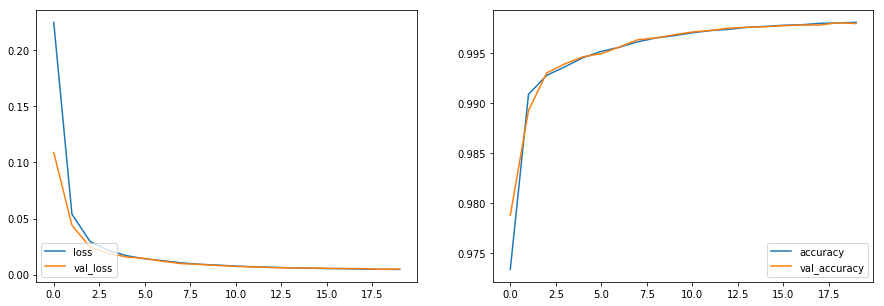

In [31]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2, 1)
plt.plot(loss, label = 'loss')
plt.plot(val_loss, label = 'val_loss')
plt.legend(loc=3)

plt.subplot(1,2, 2)
plt.plot(accuracy, label = 'accuracy')
plt.plot(val_accuracy, label = 'val_accuracy')
plt.legend(loc=4)

In [35]:
prediction = model5.predict(xt1_test2)

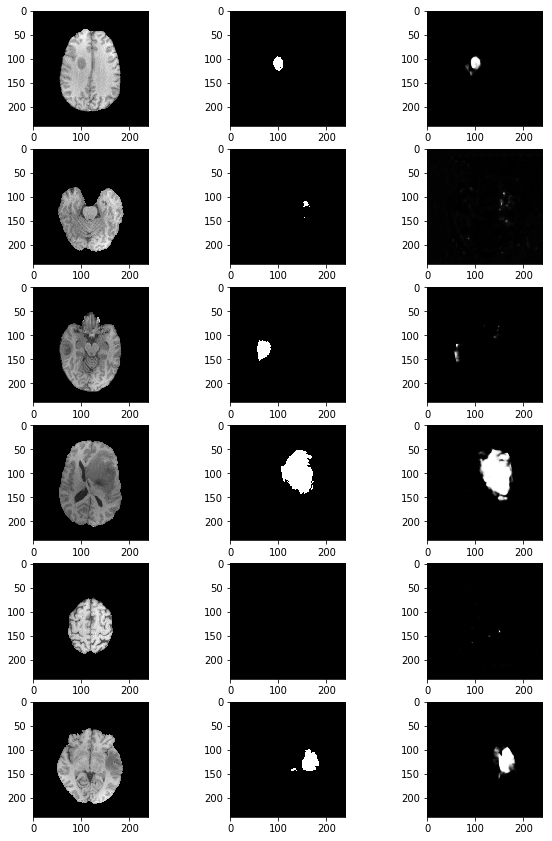

In [71]:
fig = plt.figure(figsize = (10, 25))

j = 1
for i in range(102,108):
    plt.subplot(10,3, j)
    plt.imshow(xt1_test[i], cmap='gray')
    
    j = j+1
    plt.subplot(10,3, j)
    plt.imshow(yt1_test[i], cmap='gray')
    
    j = j+1
    plt.subplot(10,3, j)
    plt.imshow(np.squeeze(prediction[i]), cmap='gray')
    
    j = j+1
    
plt.savefig('prediccionesT1_a.pdf', format='pdf',bbox_inches='tight')
plt.show()


In [31]:
# model5.save('TFM_model5.h5')

---

**Entrenamiento con imágenes T1 con contraste**

In [37]:
model6 = get_unet(input_img, n_filters=16, dropout=0.05, batchnorm=True)
model6.compile(optimizer = Adam(lr = 1e-3), loss = 'binary_crossentropy', metrics = ['accuracy'])

callbacks = [
    EarlyStopping(patience=5, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint('unet_T1ce.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

pesos_T1ce = pesos(yt1ce_train)

In [38]:
t0 = time.time()
print('Entrenando modelo 6...')
print('')

history2 = model6.fit(x=xt1ce_train2, y=yt1ce_train2, epochs=20, batch_size=20, validation_split=0.2, 
                      callbacks=callbacks, class_weight = pesos_T1ce)

t= time.time()
t_trans = t-t0
print('Entrenamiento finalizado tras', t_trans/3600, 'horas')

Entrenando modelo 6...

Train on 3780 samples, validate on 945 samples
Epoch 1/20
3780/3780 [==============================] - 49s 13ms/step - loss: 0.1401 - acc: 0.9801 - val_loss: 0.1024 - val_acc: 0.9735

Epoch 00001: val_loss improved from inf to 0.10243, saving model to unet_T1ce.h5
Epoch 2/20
3780/3780 [==============================] - 40s 11ms/step - loss: 0.0500 - acc: 0.9889 - val_loss: 0.0527 - val_acc: 0.9828

Epoch 00002: val_loss improved from 0.10243 to 0.05274, saving model to unet_T1ce.h5
Epoch 3/20
3780/3780 [==============================] - 40s 10ms/step - loss: 0.0335 - acc: 0.9907 - val_loss: 0.0294 - val_acc: 0.9911

Epoch 00003: val_loss improved from 0.05274 to 0.02936, saving model to unet_T1ce.h5
Epoch 4/20
3780/3780 [==============================] - 40s 10ms/step - loss: 0.0263 - acc: 0.9918 - val_loss: 0.0258 - val_acc: 0.9914

Epoch 00004: val_loss improved from 0.02936 to 0.02583, saving model to unet_T1ce.h5
Epoch 5/20
3780/3780 [=======================

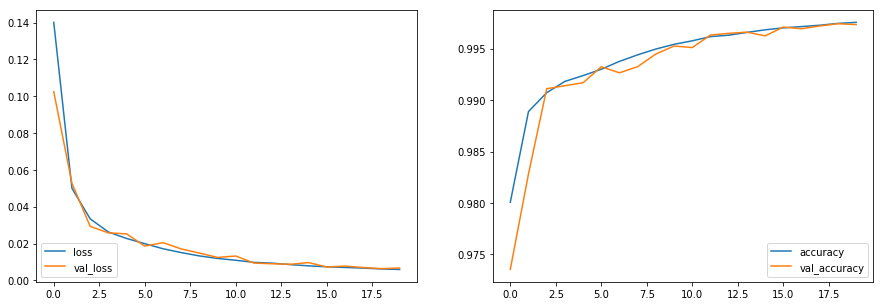

In [39]:
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
accuracy2 = history2.history['acc']
val_accuracy2 = history2.history['val_acc']

plt.figure(figsize = (15, 5))

plt.subplot(1,2, 1)
plt.plot(loss2, label = 'loss')
plt.plot(val_loss2, label = 'val_loss')
plt.legend(loc=3)

plt.subplot(1,2, 2)
plt.plot(accuracy2, label = 'accuracy')
plt.plot(val_accuracy2, label = 'val_accuracy')
plt.legend(loc=4)

In [41]:
prediction2 = model6.predict(xt1ce_test2)

In [42]:
prediction2.shape

(1590, 240, 240, 1)

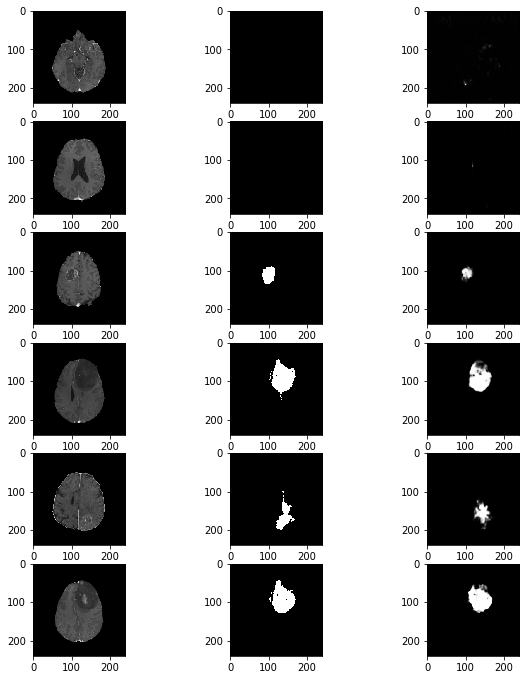

In [73]:
fig = plt.figure(figsize = (10, 20))

j = 1
for i in range(95,101):
    plt.subplot(10,3, j)
    plt.imshow(xt1ce_test[i], cmap='gray')
    
    j = j+1
    plt.subplot(10,3, j)
    plt.imshow(yt1ce_test[i], cmap='gray')
    
    j = j+1
    plt.subplot(10,3, j)
    plt.imshow(np.squeeze(prediction2[i]), cmap='gray')
    
    j = j+1
    
plt.savefig('prediccionesT1ce_a.pdf', format='pdf',bbox_inches='tight')
plt.show()


In [57]:
# model6.save('TFM_model6.h5')

----

## Cálculo del coeficiente DICE para las predicciones

**Lo primero es binarizar la predicción para que pueda ser comparada con la etiqueta real**

In [51]:
def binarizar_etiqueta(etiquetas, umbral):
    """Función a la que se le pasa un array de imágenes segmentadas. 
    Hace una copia para que no modificar el array original.
    Convierte el mapa de píxeles en binario, haciendo 1 cualquier píxel con valor distinto de 0."""
    
    tags = etiquetas.copy()
    for tag in tags:
        tag[tag > umbral] = 1
        tag[tag < umbral] = 0
    
    return tags 

In [59]:
pred_bin = binarizar_etiqueta(np.squeeze(prediction),umbral=0.1)
pred2_bin = binarizar_etiqueta(np.squeeze(prediction2),umbral=0.1)

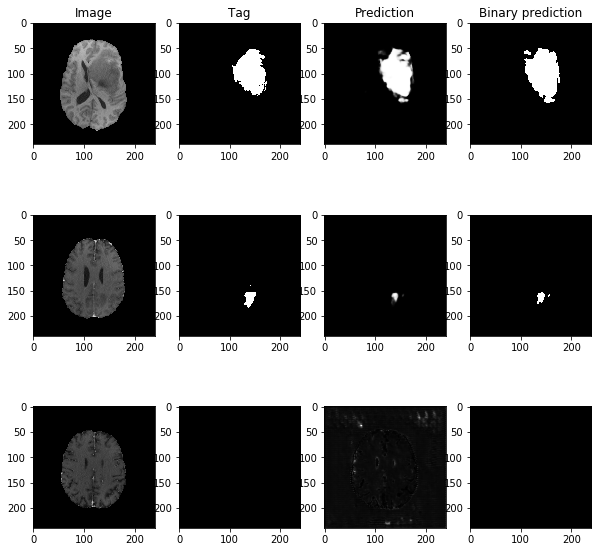

In [83]:
fig = plt.figure(figsize = (10, 10))

plt.subplot(3,4, 1)
plt.imshow(xt1_test[105], cmap='gray')
plt.title('Image')

plt.subplot(3,4, 2)
plt.imshow(yt1_test[105], cmap='gray')
plt.title('Tag')

plt.subplot(3,4, 3)
plt.imshow(np.squeeze(prediction[105]), cmap='gray')
plt.title('Prediction')

plt.subplot(3,4, 4)
plt.imshow(pred_bin[105], cmap='gray')
plt.title('Binary prediction')

plt.subplot(3,4, 5)
plt.imshow(xt1ce_test[25], cmap='gray')

plt.subplot(3,4, 6)
plt.imshow(yt1ce_test[25], cmap='gray')

plt.subplot(3,4, 7)
plt.imshow(np.squeeze(prediction2[25]), cmap='gray')

plt.subplot(3,4, 8)
plt.imshow(pred2_bin[25], cmap='gray')

plt.subplot(3,4, 9)
plt.imshow(xt1ce_test[105], cmap='gray')

plt.subplot(3,4, 10)
plt.imshow(yt1ce_test[105], cmap='gray')

plt.subplot(3,4, 11)
plt.imshow(np.squeeze(prediction2[105]), cmap='gray')

plt.subplot(3,4, 12)
plt.imshow(pred2_bin[105], cmap='gray')

plt.savefig('pred_binarizada.pdf', format='pdf',bbox_inches='tight')
plt.show()

In [61]:
dice1 = []
dice2 = []

for i in range(len(xt1_test)):
    dice1.append(dice_coef(im1= yt1_test[i], im2=pred_bin[i]))
    
for i in range(len(xt1ce_test)):
    dice2.append(dice_coef(im1= yt1ce_test[i], im2=pred2_bin[i]))

In [62]:
print('DICE imagenes T1 = ', np.round(np.mean(dice1),decimals=2) , '+-', np.round(np.std(dice1),decimals=2))
print('DICE imagenes T1 con contraste= ', np.round(np.mean(dice2),decimals=2) , '+-', np.round(np.std(dice2),decimals=2))

DICE imagenes T1 =  0.57 +- 0.39
DICE imagenes T1 con contraste=  0.53 +- 0.4


In [160]:
thresholds = [0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
DICEs_T1mean = []
DICEs_T1std = []
DICEs_T1cemean = []
DICEs_T1cestd = []

for i in thresholds:
    pred_binT1 = binarizar_etiqueta(np.squeeze(prediction),umbral= i)
    pred_binT1ce = binarizar_etiqueta(np.squeeze(prediction2),umbral= i)
    diceT1 = []
    diceT1ce = []

    for j in range(len(pred_binT1)):
        diceT1.append(dice_coef(im1= yt1_test[j], im2=pred_binT1[j]))

    for j in range(len(pred_binT1ce)):
        diceT1ce.append(dice_coef(im1= yt1ce_test[j], im2=pred_binT1ce[j]))
        
    DICEs_T1mean.append(np.mean(diceT1))
    DICEs_T1std.append(np.std(diceT1))
    DICEs_T1cemean.append(np.mean(diceT1ce))
    DICEs_T1cestd.append(np.std(diceT1ce))

In [163]:
(DICEs_T1mean)

[0.019852899175231805,
 0.5277258508466642,
 0.5659500221232973,
 0.6058157263209552,
 0.6233736811679091,
 0.6303621227578715,
 0.6364291108715494,
 0.6360614857430852,
 0.6346609288494294]

In [165]:
DICEs_T1std

[0.02782946929886281,
 0.3926665583985293,
 0.39210515990642697,
 0.39308603398712044,
 0.3905004269249558,
 0.39186884460424226,
 0.39288026112721514,
 0.3956762809159797,
 0.3982321506406862]

In [164]:
(DICEs_T1cemean)

[0.026975146314014486,
 0.5098405957194855,
 0.534820065252974,
 0.5504879615863489,
 0.5634446019051224,
 0.5724738977381206,
 0.5713281047323319,
 0.5692312546805358,
 0.5597384736764092]

In [166]:
DICEs_T1cestd

[0.03198662988767405,
 0.4011219618376414,
 0.4048599201146722,
 0.40679514378902354,
 0.4055512265841726,
 0.40644219278159777,
 0.40540449252336114,
 0.4077848537054964,
 0.40855223162547466]

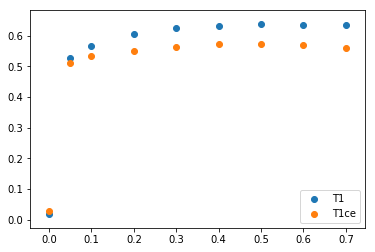

In [162]:
plt.scatter(x=thresholds, y=DICEs_T1mean, label='T1')
plt.scatter(x=thresholds, y=DICEs_T1cemean, label = 'T1ce')
plt.legend(loc = 4)

--------

**Predicciones sobre imágenes del conjunto de validación de BraTS2018**

In [93]:
import nibabel as nib

In [95]:
img_val_t1_name = './validation/Brats18_CBICA_ALZ_1_t1.nii.gz'

In [96]:
data_val_t1 = nib.load(img_val_t1_name)
img_val_t1 = data_val_t1.get_data()

In [101]:
img_val_t1 = np.transpose(img_val_t1, (2,1,0))

In [113]:
img_val_t1 = [img_val_t1[i]/np.max(img_val_t1[i]) if np.sum(img_val_t1[i])!=0 
              else img_val_t1[i] for i in range(len(img_val_t1)) ]  
img_val_t1 = np.asarray(img_val_t1)

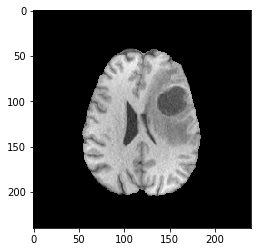

In [114]:
plt.imshow(img_val_t1[90], cmap='gray')

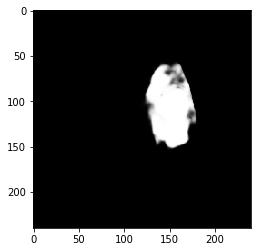

In [116]:
pred_val_t1 = model5.predict(np.expand_dims(img_val_t1[90:91],-1))
plt.imshow(np.squeeze(pred_val_t1), cmap='gray')

In [119]:
img2_val_t1_name = './validation/Brats18_WashU_W033_1_t1.nii.gz'
data2_val_t1 = nib.load(img2_val_t1_name)
img2_val_t1 = data2_val_t1.get_data()
img2_val_t1 = np.transpose(img2_val_t1, (2,1,0))
img2_val_t1 = [img2_val_t1[i]/np.max(img2_val_t1[i]) if np.sum(img2_val_t1[i])!=0 
              else img2_val_t1[i] for i in range(len(img2_val_t1)) ]  
img2_val_t1 = np.asarray(img2_val_t1)

img2_val_t1ce_name = './validation/Brats18_WashU_W033_1_t1ce.nii.gz'
data2_val_t1ce = nib.load(img2_val_t1ce_name)
img2_val_t1ce = data2_val_t1ce.get_data()
img2_val_t1ce = np.transpose(img2_val_t1ce, (2,1,0))
img2_val_t1ce = [img2_val_t1ce[i]/np.max(img2_val_t1ce[i]) if np.sum(img2_val_t1ce[i])!=0 
              else img2_val_t1ce[i] for i in range(len(img2_val_t1ce)) ]  
img2_val_t1ce = np.asarray(img2_val_t1ce)

In [123]:
pred2_val_t1 = model5.predict(np.expand_dims(img2_val_t1[90:91],-1))
pred2_val_t1ce = model6.predict(np.expand_dims(img2_val_t1ce[90:91],-1))


Text(0.5, 1.0, 'T1ce prediction')

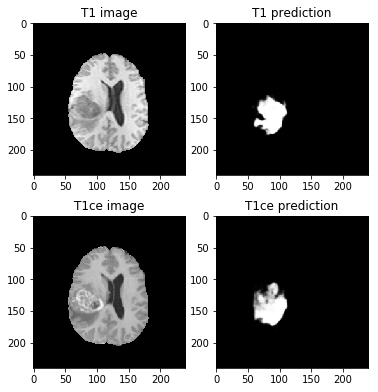

In [183]:
plt.figure(figsize=(6,6.5))

plt.subplot(2,2,1)
plt.imshow(img2_val_t1[90], cmap='gray')
plt.title('T1 image')

plt.subplot(2,2,2)
plt.imshow(np.squeeze(pred2_val_t1), cmap='gray')
plt.title('T1 prediction')

plt.subplot(2,2,3)
plt.imshow(img2_val_t1ce[90], cmap='gray')
plt.title('T1ce image')

plt.subplot(2,2,4)
plt.imshow(np.squeeze(pred2_val_t1ce), cmap='gray')
plt.title('T1ce prediction')


In [125]:
img3_val_t1_name = './validation/Brats18_UAB_3490_1_t1.nii.gz'
data3_val_t1 = nib.load(img3_val_t1_name)
img3_val_t1 = data3_val_t1.get_data()
img3_val_t1 = np.transpose(img3_val_t1, (2,1,0))
img3_val_t1 = [img3_val_t1[i]/np.max(img3_val_t1[i]) if np.sum(img3_val_t1[i])!=0 
              else img3_val_t1[i] for i in range(len(img3_val_t1)) ]  
img3_val_t1 = np.asarray(img3_val_t1)

img3_val_t1ce_name = './validation/Brats18_UAB_3490_1_t1ce.nii.gz'
data3_val_t1ce = nib.load(img3_val_t1ce_name)
img3_val_t1ce = data3_val_t1ce.get_data()
img3_val_t1ce = np.transpose(img3_val_t1ce, (2,1,0))
img3_val_t1ce = [img3_val_t1ce[i]/np.max(img3_val_t1ce[i]) if np.sum(img3_val_t1ce[i])!=0 
              else img3_val_t1ce[i] for i in range(len(img3_val_t1ce)) ]  
img3_val_t1ce = np.asarray(img3_val_t1ce)

In [127]:
pred3_val_t1 = model5.predict(np.expand_dims(img3_val_t1[90:91],-1))
pred3_val_t1ce = model6.predict(np.expand_dims(img3_val_t1ce[90:91],-1))

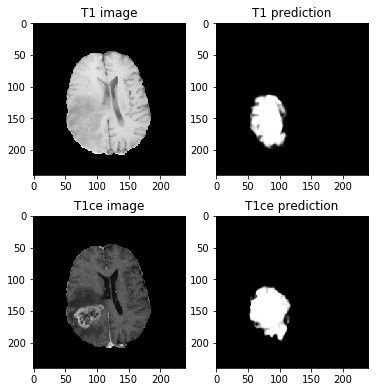

In [182]:
plt.figure(figsize=(6,6.5))

plt.subplot(2,2,1)
plt.imshow(img3_val_t1[90], cmap='gray')
plt.title('T1 image')

plt.subplot(2,2,2)
plt.imshow(np.squeeze(pred3_val_t1), cmap='gray')
plt.title('T1 prediction')

plt.subplot(2,2,3)
plt.imshow(img3_val_t1ce[90], cmap='gray')
plt.title('T1ce image')

plt.subplot(2,2,4)
plt.imshow(np.squeeze(pred3_val_t1ce), cmap='gray')
plt.title('T1ce prediction')

plt.show()

In [167]:
img4_val_t1_name = './validation/Brats18_MDA_1012_1_t1.nii.gz'
data4_val_t1 = nib.load(img4_val_t1_name)
img4_val_t1 = data4_val_t1.get_data()
img4_val_t1 = np.transpose(img4_val_t1, (2,1,0))
img4_val_t1 = [img4_val_t1[i]/np.max(img4_val_t1[i]) if np.sum(img4_val_t1[i])!=0 
              else img4_val_t1[i] for i in range(len(img4_val_t1)) ]  
img4_val_t1 = np.asarray(img4_val_t1)

img4_val_t1ce_name = './validation/Brats18_MDA_1012_1_t1ce.nii.gz'
data4_val_t1ce = nib.load(img4_val_t1ce_name)
img4_val_t1ce = data4_val_t1ce.get_data()
img4_val_t1ce = np.transpose(img4_val_t1ce, (2,1,0))
img4_val_t1ce = [img4_val_t1ce[i]/np.max(img4_val_t1ce[i]) if np.sum(img4_val_t1ce[i])!=0 
              else img4_val_t1ce[i] for i in range(len(img4_val_t1ce)) ]  
img4_val_t1ce = np.asarray(img4_val_t1ce)

In [173]:
pred4_val_t1 = model5.predict(np.expand_dims(img4_val_t1[80:81],-1))
pred4_val_t1ce = model6.predict(np.expand_dims(img4_val_t1ce[80:81],-1))

Text(0.5, 1.0, 'T1ce prediction')

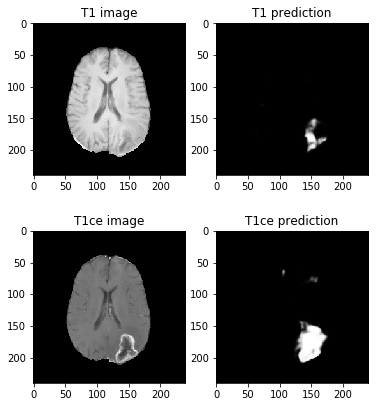

In [178]:
plt.figure(figsize=(6,7))

plt.subplot(2,2,1)
plt.imshow(img4_val_t1[80], cmap='gray')
plt.title('T1 image')

plt.subplot(2,2,2)
plt.imshow(np.squeeze(pred4_val_t1), cmap='gray')
plt.title('T1 prediction')

plt.subplot(2,2,3)
plt.imshow(img4_val_t1ce[80], cmap='gray')
plt.title('T1ce image')

plt.subplot(2,2,4)
plt.imshow(np.squeeze(pred4_val_t1ce), cmap='gray')
plt.title('T1ce prediction')